# Load Pakages

In [104]:
import os
import numpy as np
import pandas as pd


In [105]:
# image data

In [106]:
def create_dataframe(image_dir, target):
    data = []
    for root, _, files in os.walk(image_dir):
        for file in files:
            if file.endswith(".jpg"):
                image_path = os.path.join(root, file)  # 이미지 전체 경로
                image_name = file
                patient_id, image_number = file.split('_')
                #image_number = image_number.split('.')[0]  # 확장자 제거
                data.append([image_path, image_name, target, patient_id, image_number])
    
    df = pd.DataFrame(data, columns=["image_path", "image_name", "target", "patient_id", "image_number"])
    return df


# 예제 사용법
base_dir = "C:/Users/mani/Documents/code/DB"

df_1 = create_dataframe(os.path.join(base_dir, "1"), target=0)
df_2 = create_dataframe(os.path.join(base_dir, "2"), target=1)
df_3 = create_dataframe(os.path.join(base_dir, "3"), target=1)
df_4 = create_dataframe(os.path.join(base_dir, "4"), target=1)

# 각 데이터 프레임 출력
print("DataFrame for DB/1:")
print(df_1.head())
print()

print("DataFrame for DB/2:")
print(df_2.head())
print()

print("DataFrame for DB/3:")
print(df_3.head())
print()

print("DataFrame for DB/4:")
print(df_4.head())
print()

DataFrame for DB/1:
                                     image_path  image_name  target  \
0   C:/Users/mani/Documents/code/DB\1\100_1.jpg   100_1.jpg       0   
1  C:/Users/mani/Documents/code/DB\1\100_10.jpg  100_10.jpg       0   
2  C:/Users/mani/Documents/code/DB\1\100_11.jpg  100_11.jpg       0   
3  C:/Users/mani/Documents/code/DB\1\100_12.jpg  100_12.jpg       0   
4  C:/Users/mani/Documents/code/DB\1\100_13.jpg  100_13.jpg       0   

  patient_id image_number  
0        100        1.jpg  
1        100       10.jpg  
2        100       11.jpg  
3        100       12.jpg  
4        100       13.jpg  

DataFrame for DB/2:
                                     image_path  image_name  target  \
0   C:/Users/mani/Documents/code/DB\2\106_1.jpg   106_1.jpg       1   
1  C:/Users/mani/Documents/code/DB\2\106_10.jpg  106_10.jpg       1   
2  C:/Users/mani/Documents/code/DB\2\106_11.jpg  106_11.jpg       1   
3  C:/Users/mani/Documents/code/DB\2\106_12.jpg  106_12.jpg       1   
4  C:/Use

In [107]:
df_combined = pd.concat([df_1, df_2, df_3, df_4], ignore_index=True)
df_combined

,image_path,image_name,target,patient_id,image_number
0,C:/Users/mani/Documents/code/DB\1\100_1.jpg,100_1.jpg,0,100,1.jpg
1,C:/Users/mani/Documents/code/DB\1\100_10.jpg,100_10.jpg,0,100,10.jpg
2,C:/Users/mani/Documents/code/DB\1\100_11.jpg,100_11.jpg,0,100,11.jpg
3,C:/Users/mani/Documents/code/DB\1\100_12.jpg,100_12.jpg,0,100,12.jpg
4,C:/Users/mani/Documents/code/DB\1\100_13.jpg,100_13.jpg,0,100,13.jpg
...,...,...,...,...,...
13870,C:/Users/mani/Documents/code/DB\4\375_5.jpg,375_5.jpg,1,375,5.jpg
13871,C:/Users/mani/Documents/code/DB\4\375_6.jpg,375_6.jpg,1,375,6.jpg
13872,C:/Users/mani/Documents/code/DB\4\375_7.jpg,375_7.jpg,1,375,7.jpg
13873,C:/Users/mani/Documents/code/DB\4\375_8.jpg,375_8.jpg,1,375,8.jpg


# meta data preprocessing

In [108]:
import pandas as pd
import glob

# 경로 지정
base_path = 'C:/Users/mani/Documents/code/medical_paper/Pancrease cell (Normal _ cancer)/'

# 각 경로와 파일 패턴을 지정
file_paths = [
    '1. H6c7 Cell (Normal)/H6c7 cell _ Cell analysis/220126 H6c7 (Cell 분석).xlsx',
    
    '2. Capan-2 cell (Cancer)/Capan-2 cell _ Cell analysis/211203 Capan-2 cell 분석.xlsx',
    
    '3. PSN-1 cell (Cancer)/PSN-1 cell _ Cell analysis/211116 PSN-1 (Cell 분석).xlsx',
    '3. PSN-1 cell (Cancer)/PSN-1 cell _ Cell analysis/220125 PSN-1 (Cell 분석).xlsx',
    '3. PSN-1 cell (Cancer)/PSN-1 cell _ Cell analysis/220127 PSN-1 (Cell 분석).xlsx',

    '4. BxPc-3 cell (Cancer)/BxPc-3 cell _ Cell analysis/211201 BxPc-3 (Cell 분석).xlsx'

]

# 각 파일을 읽어서 리스트에 저장
df_list = []

for file_path in file_paths:
    full_path = base_path + file_path
    # Excel 파일을 읽음
    # engine='openpyxl' 추가 하지 않으면 NO. 컬럼을 기준으로 정렬 하므로 데이터가 섞이게 된다.
    df = pd.read_excel(full_path, engine='openpyxl')    
    # 데이터프레임 리스트에 추가
    df_list.append(df)

# 모든 데이터프레임을 하나로 합침
df_temp = pd.concat(df_list, ignore_index=True)

# patient_id 컬럼 추가
df_temp['patient_id'] = df_temp.index + 1

# 결과 확인
df_temp

,No.,Title,Volume (um³),Surface area (um²),Projected area (um²),Mean RI,Concentration (pg/um³),Dry mass (pg),Sphericity,Threshold RI,patient_id
0,1,133803.302.H6c7-001,3298.1610,1557.7227,366.2351,1.3590,0.1331,439.0075,0.6879,1.3487,1
1,2,133846.976.H6c7-002,5560.6720,2623.3642,635.5633,1.3516,0.0943,524.2144,0.5786,1.3451,2
2,3,133934.097.H6c7-003,4432.8365,2271.1300,515.7581,1.3556,0.1154,511.5728,0.5746,1.3470,3
3,5,134208.878.H6c7-005,6850.0187,3602.2249,647.1439,1.3490,0.0807,552.6056,0.4842,1.3442,4
4,6,134251.336.H6c7-006,2896.3871,1471.4037,370.3886,1.3537,0.1051,304.2909,0.6678,1.3458,5
...,...,...,...,...,...,...,...,...,...,...,...
370,70,110910.973.BxPc-3-070,4732.6382,2034.8347,513.5410,1.3576,0.1258,595.2011,0.6699,1.3479,371
371,71,110921.537.BxPc-3-071,4127.0906,1843.4792,475.2231,1.3570,0.1226,506.0374,0.6750,1.3478,372
372,72,111016.586.BxPc-3-072,3192.6844,1494.4279,392.9894,1.3565,0.1200,383.0447,0.7016,1.3473,373
373,73,111028.367.BxPc-3-073,4491.8014,3402.6907,604.1895,1.3539,0.1062,476.8509,0.3869,1.3453,374


In [109]:
df_meta = df_temp[['patient_id','Surface area (um²)', 'Concentration (pg/um³)']]
df_meta

,patient_id,Surface area (um²),Concentration (pg/um³)
0,1,1557.7227,0.1331
1,2,2623.3642,0.0943
2,3,2271.1300,0.1154
3,4,3602.2249,0.0807
4,5,1471.4037,0.1051
...,...,...,...
370,371,2034.8347,0.1258
371,372,1843.4792,0.1226
372,373,1494.4279,0.1200
373,374,3402.6907,0.1062


In [132]:
# 변수 각각 제곱
df_meta['Surface_Area_Squared'] = df_meta['Surface area (um²)'] ** 2
df_meta['Concentration_Squared'] = df_meta['Concentration (pg/um³)'] ** 2

# 두 변수를 곱한 새로운 변수 생성
df_meta['SA_Conc_Product'] = df_meta['Surface area (um²)'] * df_meta['Concentration (pg/um³)']



   Surface_Area_Squared  Concentration_Squared  SA_Conc_Product
0          2.426500e+06               0.017716       207.332891
1          6.882040e+06               0.008892       247.383244
2          5.158031e+06               0.013317       262.088402
3          1.297602e+07               0.006512       290.699549
4          2.165029e+06               0.011046       154.644529


C:\Users\mani\AppData\Local\Temp\ipykernel_17332\4152248762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta['Surface_Area_Squared'] = df_meta['Surface area (um²)'] ** 2
C:\Users\mani\AppData\Local\Temp\ipykernel_17332\4152248762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta['Concentration_Squared'] = df_meta['Concentration (pg/um³)'] ** 2
C:\Users\mani\AppData\Local\Temp\ipykernel_17332\4152248762.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [133]:
df_meta

,patient_id,Surface area (um²),Concentration (pg/um³),Surface_Area_Squared,Concentration_Squared,SA_Conc_Product
0,1,1557.7227,0.1331,2.426500e+06,0.017716,207.332891
1,2,2623.3642,0.0943,6.882040e+06,0.008892,247.383244
2,3,2271.1300,0.1154,5.158031e+06,0.013317,262.088402
3,4,3602.2249,0.0807,1.297602e+07,0.006512,290.699549
4,5,1471.4037,0.1051,2.165029e+06,0.011046,154.644529
...,...,...,...,...,...,...
370,371,2034.8347,0.1258,4.140552e+06,0.015826,255.982205
371,372,1843.4792,0.1226,3.398416e+06,0.015031,226.010550
372,373,1494.4279,0.1200,2.233315e+06,0.014400,179.331348
373,374,3402.6907,0.1062,1.157830e+07,0.011278,361.365752


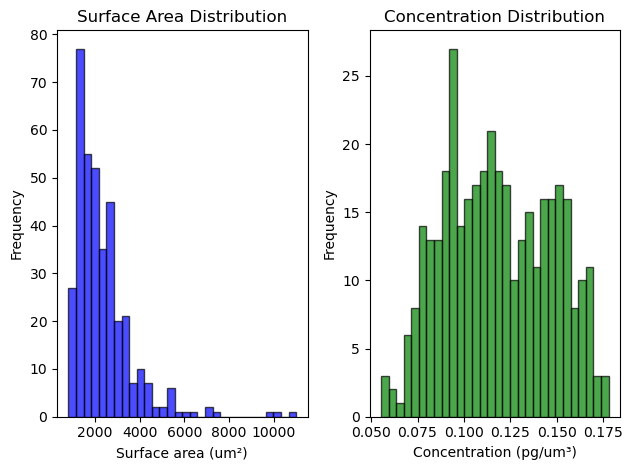

In [131]:
# Surface Area Distribution
plt.subplot(1, 2, 1)
plt.hist(df_meta['Surface area (um²)'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Surface Area Distribution')
plt.xlabel('Surface area (um²)')
plt.ylabel('Frequency')

# Concentration Distribution
plt.subplot(1, 2, 2)
plt.hist(df_meta['Concentration (pg/um³)'], bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Concentration Distribution')
plt.xlabel('Concentration (pg/um³)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\mani\AppData\Local\Temp\ipykernel_17332\2129559436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta['Surface_Area_Squared'] = df_meta['Surface area (um²)'] ** 2
C:\Users\mani\AppData\Local\Temp\ipykernel_17332\2129559436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta['Concentration_Squared'] = df_meta['Concentration (pg/um³)'] ** 2
C:\Users\mani\AppData\Local\Temp\ipykernel_17332\2129559436.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

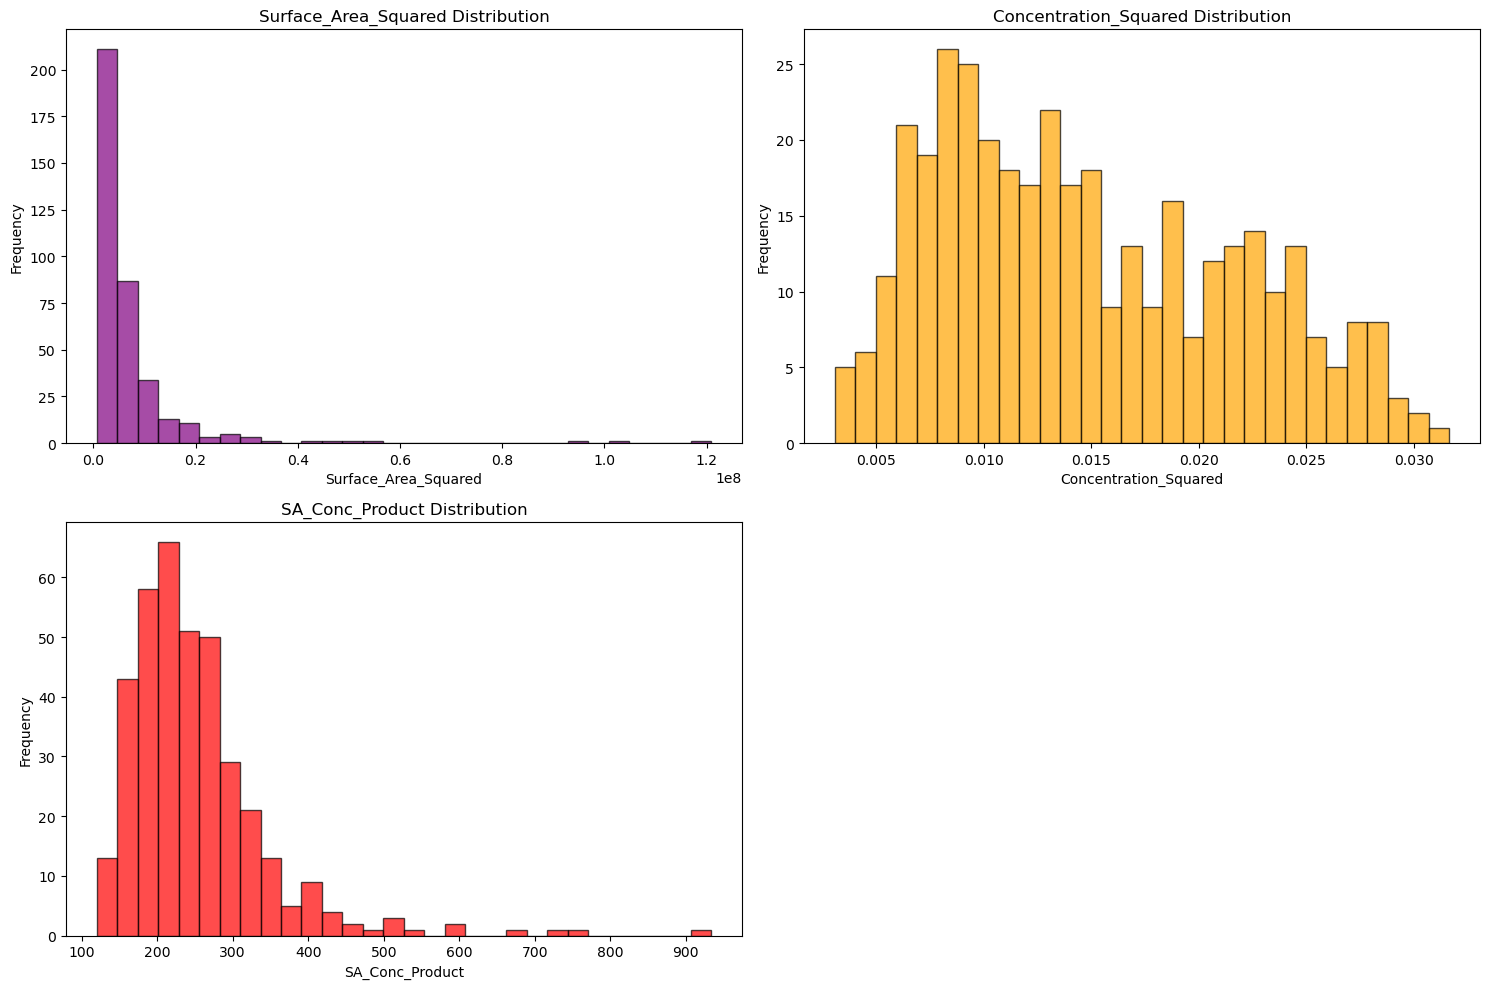

In [134]:
# Regenerating the new features in case they were not created
df_meta['Surface_Area_Squared'] = df_meta['Surface area (um²)'] ** 2
df_meta['Concentration_Squared'] = df_meta['Concentration (pg/um³)'] ** 2
df_meta['SA_Conc_Product'] = df_meta['Surface area (um²)'] * df_meta['Concentration (pg/um³)']

# Plotting distributions of the newly created features
plt.figure(figsize=(15, 10))

# Surface_Area_Squared Distribution
plt.subplot(2, 2, 1)
plt.hist(df_meta['Surface_Area_Squared'], bins=30, color='purple', alpha=0.7, edgecolor='black')
plt.title('Surface_Area_Squared Distribution')
plt.xlabel('Surface_Area_Squared')
plt.ylabel('Frequency')

# Concentration_Squared Distribution
plt.subplot(2, 2, 2)
plt.hist(df_meta['Concentration_Squared'], bins=30, color='orange', alpha=0.7, edgecolor='black')
plt.title('Concentration_Squared Distribution')
plt.xlabel('Concentration_Squared')
plt.ylabel('Frequency')

# SA_Conc_Product Distribution
plt.subplot(2, 2, 3)
plt.hist(df_meta['SA_Conc_Product'], bins=30, color='red', alpha=0.7, edgecolor='black')
plt.title('SA_Conc_Product Distribution')
plt.xlabel('SA_Conc_Product')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Data Frame concatanate


In [135]:
df_combined['patient_id'] = df_combined['patient_id'].astype(int)
df_meta['patient_id'] = df_meta['patient_id'].astype(int)

C:\Users\mani\AppData\Local\Temp\ipykernel_17332\3290730208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta['patient_id'] = df_meta['patient_id'].astype(int)


In [136]:
df_combined.patient_id.dtype

dtype('int64')

In [137]:
df_meta.patient_id.dtype

dtype('int64')

In [138]:
df_merge = pd.merge(df_combined, df_meta, on='patient_id', how='left')
df_merge

,image_path,image_name,target,patient_id,image_number,Surface area (um²),Concentration (pg/um³),Surface_Area_Squared,Concentration_Squared,SA_Conc_Product
0,C:/Users/mani/Documents/code/DB\1\100_1.jpg,100_1.jpg,0,100,1.jpg,2452.5294,0.0871,6.014900e+06,0.007586,213.615311
1,C:/Users/mani/Documents/code/DB\1\100_10.jpg,100_10.jpg,0,100,10.jpg,2452.5294,0.0871,6.014900e+06,0.007586,213.615311
2,C:/Users/mani/Documents/code/DB\1\100_11.jpg,100_11.jpg,0,100,11.jpg,2452.5294,0.0871,6.014900e+06,0.007586,213.615311
3,C:/Users/mani/Documents/code/DB\1\100_12.jpg,100_12.jpg,0,100,12.jpg,2452.5294,0.0871,6.014900e+06,0.007586,213.615311
4,C:/Users/mani/Documents/code/DB\1\100_13.jpg,100_13.jpg,0,100,13.jpg,2452.5294,0.0871,6.014900e+06,0.007586,213.615311
...,...,...,...,...,...,...,...,...,...,...
13870,C:/Users/mani/Documents/code/DB\4\375_5.jpg,375_5.jpg,1,375,5.jpg,2152.8617,0.1015,4.634813e+06,0.010302,218.515463
13871,C:/Users/mani/Documents/code/DB\4\375_6.jpg,375_6.jpg,1,375,6.jpg,2152.8617,0.1015,4.634813e+06,0.010302,218.515463
13872,C:/Users/mani/Documents/code/DB\4\375_7.jpg,375_7.jpg,1,375,7.jpg,2152.8617,0.1015,4.634813e+06,0.010302,218.515463
13873,C:/Users/mani/Documents/code/DB\4\375_8.jpg,375_8.jpg,1,375,8.jpg,2152.8617,0.1015,4.634813e+06,0.010302,218.515463


In [139]:
df_merge['Surface area (um²)'].value_counts(dropna=False)

Surface area (um²)
2152.8617    37
2452.5294    37
2882.6256    37
1454.2886    37
4199.4178    37
             ..
1821.7361    37
3083.0937    37
3305.2695    37
4114.0714    37
3470.7977    37
Name: count, Length: 375, dtype: int64

In [140]:
df_merge['Surface area (um²)'].value_counts(dropna=False).value_counts()

count
37    375
Name: count, dtype: int64

In [141]:
df_merge['Concentration (pg/um³)'].value_counts(dropna=False)

Concentration (pg/um³)
0.1240    148
0.1258    111
0.0934    111
0.0956    111
0.1464    111
         ... 
0.1463     37
0.0931     37
0.0936     37
0.0786     37
0.0691     37
Name: count, Length: 315, dtype: int64

In [142]:
df_merge['Concentration (pg/um³)'].value_counts(dropna=False).value_counts()

count
37     264
74      43
111      7
148      1
Name: count, dtype: int64

In [148]:
df_merge['Surface_Area_Squared'].value_counts(dropna=False).value_counts()

count
37    375
Name: count, dtype: int64

In [147]:
df_merge['Concentration_Squared'].value_counts(dropna=False).value_counts()

count
37     264
74      43
111      7
148      1
Name: count, dtype: int64

In [151]:
df_merge['SA_Conc_Product'].value_counts(dropna=False).value_counts()

count
37    375
Name: count, dtype: int64

In [152]:
df_merge

,image_path,image_name,target,patient_id,image_number,Surface area (um²),Concentration (pg/um³),Surface_Area_Squared,Concentration_Squared,SA_Conc_Product
0,C:/Users/mani/Documents/code/DB\1\100_1.jpg,100_1.jpg,0,100,1.jpg,2452.5294,0.0871,6.014900e+06,0.007586,213.615311
1,C:/Users/mani/Documents/code/DB\1\100_10.jpg,100_10.jpg,0,100,10.jpg,2452.5294,0.0871,6.014900e+06,0.007586,213.615311
2,C:/Users/mani/Documents/code/DB\1\100_11.jpg,100_11.jpg,0,100,11.jpg,2452.5294,0.0871,6.014900e+06,0.007586,213.615311
3,C:/Users/mani/Documents/code/DB\1\100_12.jpg,100_12.jpg,0,100,12.jpg,2452.5294,0.0871,6.014900e+06,0.007586,213.615311
4,C:/Users/mani/Documents/code/DB\1\100_13.jpg,100_13.jpg,0,100,13.jpg,2452.5294,0.0871,6.014900e+06,0.007586,213.615311
...,...,...,...,...,...,...,...,...,...,...
13870,C:/Users/mani/Documents/code/DB\4\375_5.jpg,375_5.jpg,1,375,5.jpg,2152.8617,0.1015,4.634813e+06,0.010302,218.515463
13871,C:/Users/mani/Documents/code/DB\4\375_6.jpg,375_6.jpg,1,375,6.jpg,2152.8617,0.1015,4.634813e+06,0.010302,218.515463
13872,C:/Users/mani/Documents/code/DB\4\375_7.jpg,375_7.jpg,1,375,7.jpg,2152.8617,0.1015,4.634813e+06,0.010302,218.515463
13873,C:/Users/mani/Documents/code/DB\4\375_8.jpg,375_8.jpg,1,375,8.jpg,2152.8617,0.1015,4.634813e+06,0.010302,218.515463


# Create a CSV file & Folder

In [163]:
import os
import shutil
import pandas as pd
import numpy as np

# patient_id를 stratify 하여 데이터를 분리하는 함수
def stratified_sampling_by_patient_and_target(df, test_size=0.2, random_state=2359):
    if random_state:
        np.random.seed(random_state)
    
    # patient_id별로 그룹화
    patient_groups = df.groupby('patient_id')
    
    # train, test 분할을 위한 patient_id 저장
    train_patient_ids = []
    test_patient_ids = []
    
    # target 비율을 맞추기 위한 방법
    target_distribution = df['target'].value_counts(normalize=True)
    
    # 각 target 값에 대해 샘플링
    for target_value, proportion in target_distribution.items():
        # 해당 target을 가진 patient_id 추출
        target_patient_ids = df[df['target'] == target_value]['patient_id'].unique()
        
        # target_value에 대한 patient_id를 분할
        np.random.shuffle(target_patient_ids)
        split_idx = int(len(target_patient_ids) * (1 - test_size))
        
        # patient_id를 train과 test로 분배
        train_patient_ids.extend(target_patient_ids[:split_idx])
        test_patient_ids.extend(target_patient_ids[split_idx:])
    
    # train과 test 데이터프레임 생성
    train_df = df[df['patient_id'].isin(train_patient_ids)].reset_index(drop=True)
    test_df = df[df['patient_id'].isin(test_patient_ids)].reset_index(drop=True)
    
    return train_df, test_df

# 이미지를 이동 및 폴더 생성하는 함수
def save_images_and_csv(train_df, test_df, output_dir, image_col):
    # 폴더 생성
    train_dir = os.path.join(output_dir, 'train')
    test_dir = os.path.join(output_dir, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    
    # CSV 저장
    train_csv_path = os.path.join(output_dir, 'train.csv')
    test_csv_path = os.path.join(output_dir, 'test.csv')
    train_df.to_csv(train_csv_path, index=False)
    test_df.to_csv(test_csv_path, index=False)
    
    # 이미지 이동
    for _, row in train_df.iterrows():
        src = row[image_col]  # 이미지 원본 경로
        dst = os.path.join(train_dir, os.path.basename(src))  # train 폴더로 이동
        shutil.copy(src, dst)
    
    for _, row in test_df.iterrows():
        src = row[image_col]  # 이미지 원본 경로
        dst = os.path.join(test_dir, os.path.basename(src))  # test 폴더로 이동
        shutil.copy(src, dst)
    
    print(f"Train images saved to: {train_dir}")
    print(f"Test images saved to: {test_dir}")
    print(f"CSV files saved to: {output_dir}")

# patient_id를 기준으로 stratify 적용하여 데이터 분리
train_df, test_df = stratified_sampling_by_patient_and_target(df_merge, test_size=0.2, random_state=2359)

# 이미지와 CSV 저장
output_dir = "./output"  # 출력 디렉토리 경로
save_images_and_csv(train_df, test_df, output_dir, image_col='image_path')
 

Train images saved to: ./output\train
Test images saved to: ./output\test
CSV files saved to: ./output


# Check data split


In [164]:
train_df

,image_path,image_name,target,patient_id,image_number,Surface area (um²),Concentration (pg/um³),Surface_Area_Squared,Concentration_Squared,SA_Conc_Product
0,C:/Users/mani/Documents/code/DB\1\100_1.jpg,100_1.jpg,0,100,1.jpg,2452.5294,0.0871,6.014900e+06,0.007586,213.615311
1,C:/Users/mani/Documents/code/DB\1\100_10.jpg,100_10.jpg,0,100,10.jpg,2452.5294,0.0871,6.014900e+06,0.007586,213.615311
2,C:/Users/mani/Documents/code/DB\1\100_11.jpg,100_11.jpg,0,100,11.jpg,2452.5294,0.0871,6.014900e+06,0.007586,213.615311
3,C:/Users/mani/Documents/code/DB\1\100_12.jpg,100_12.jpg,0,100,12.jpg,2452.5294,0.0871,6.014900e+06,0.007586,213.615311
4,C:/Users/mani/Documents/code/DB\1\100_13.jpg,100_13.jpg,0,100,13.jpg,2452.5294,0.0871,6.014900e+06,0.007586,213.615311
...,...,...,...,...,...,...,...,...,...,...
11095,C:/Users/mani/Documents/code/DB\4\375_5.jpg,375_5.jpg,1,375,5.jpg,2152.8617,0.1015,4.634813e+06,0.010302,218.515463
11096,C:/Users/mani/Documents/code/DB\4\375_6.jpg,375_6.jpg,1,375,6.jpg,2152.8617,0.1015,4.634813e+06,0.010302,218.515463
11097,C:/Users/mani/Documents/code/DB\4\375_7.jpg,375_7.jpg,1,375,7.jpg,2152.8617,0.1015,4.634813e+06,0.010302,218.515463
11098,C:/Users/mani/Documents/code/DB\4\375_8.jpg,375_8.jpg,1,375,8.jpg,2152.8617,0.1015,4.634813e+06,0.010302,218.515463


In [165]:
test_df

,image_path,image_name,target,patient_id,image_number,Surface area (um²),Concentration (pg/um³),Surface_Area_Squared,Concentration_Squared,SA_Conc_Product
0,C:/Users/mani/Documents/code/DB\1\105_1.jpg,105_1.jpg,0,105,1.jpg,2056.4210,0.1077,4.228867e+06,0.011599,221.476542
1,C:/Users/mani/Documents/code/DB\1\105_10.jpg,105_10.jpg,0,105,10.jpg,2056.4210,0.1077,4.228867e+06,0.011599,221.476542
2,C:/Users/mani/Documents/code/DB\1\105_11.jpg,105_11.jpg,0,105,11.jpg,2056.4210,0.1077,4.228867e+06,0.011599,221.476542
3,C:/Users/mani/Documents/code/DB\1\105_12.jpg,105_12.jpg,0,105,12.jpg,2056.4210,0.1077,4.228867e+06,0.011599,221.476542
4,C:/Users/mani/Documents/code/DB\1\105_13.jpg,105_13.jpg,0,105,13.jpg,2056.4210,0.1077,4.228867e+06,0.011599,221.476542
...,...,...,...,...,...,...,...,...,...,...
2770,C:/Users/mani/Documents/code/DB\4\374_5.jpg,374_5.jpg,1,374,5.jpg,3402.6907,0.1062,1.157830e+07,0.011278,361.365752
2771,C:/Users/mani/Documents/code/DB\4\374_6.jpg,374_6.jpg,1,374,6.jpg,3402.6907,0.1062,1.157830e+07,0.011278,361.365752
2772,C:/Users/mani/Documents/code/DB\4\374_7.jpg,374_7.jpg,1,374,7.jpg,3402.6907,0.1062,1.157830e+07,0.011278,361.365752
2773,C:/Users/mani/Documents/code/DB\4\374_8.jpg,374_8.jpg,1,374,8.jpg,3402.6907,0.1062,1.157830e+07,0.011278,361.365752


In [166]:
train_df = train_df.drop(columns=['image_path'])
test_df = test_df.drop(columns=['image_path'])

In [167]:
train_df

,image_name,target,patient_id,image_number,Surface area (um²),Concentration (pg/um³),Surface_Area_Squared,Concentration_Squared,SA_Conc_Product
0,100_1.jpg,0,100,1.jpg,2452.5294,0.0871,6.014900e+06,0.007586,213.615311
1,100_10.jpg,0,100,10.jpg,2452.5294,0.0871,6.014900e+06,0.007586,213.615311
2,100_11.jpg,0,100,11.jpg,2452.5294,0.0871,6.014900e+06,0.007586,213.615311
3,100_12.jpg,0,100,12.jpg,2452.5294,0.0871,6.014900e+06,0.007586,213.615311
4,100_13.jpg,0,100,13.jpg,2452.5294,0.0871,6.014900e+06,0.007586,213.615311
...,...,...,...,...,...,...,...,...,...
11095,375_5.jpg,1,375,5.jpg,2152.8617,0.1015,4.634813e+06,0.010302,218.515463
11096,375_6.jpg,1,375,6.jpg,2152.8617,0.1015,4.634813e+06,0.010302,218.515463
11097,375_7.jpg,1,375,7.jpg,2152.8617,0.1015,4.634813e+06,0.010302,218.515463
11098,375_8.jpg,1,375,8.jpg,2152.8617,0.1015,4.634813e+06,0.010302,218.515463


In [168]:
test_df

,image_name,target,patient_id,image_number,Surface area (um²),Concentration (pg/um³),Surface_Area_Squared,Concentration_Squared,SA_Conc_Product
0,105_1.jpg,0,105,1.jpg,2056.4210,0.1077,4.228867e+06,0.011599,221.476542
1,105_10.jpg,0,105,10.jpg,2056.4210,0.1077,4.228867e+06,0.011599,221.476542
2,105_11.jpg,0,105,11.jpg,2056.4210,0.1077,4.228867e+06,0.011599,221.476542
3,105_12.jpg,0,105,12.jpg,2056.4210,0.1077,4.228867e+06,0.011599,221.476542
4,105_13.jpg,0,105,13.jpg,2056.4210,0.1077,4.228867e+06,0.011599,221.476542
...,...,...,...,...,...,...,...,...,...
2770,374_5.jpg,1,374,5.jpg,3402.6907,0.1062,1.157830e+07,0.011278,361.365752
2771,374_6.jpg,1,374,6.jpg,3402.6907,0.1062,1.157830e+07,0.011278,361.365752
2772,374_7.jpg,1,374,7.jpg,3402.6907,0.1062,1.157830e+07,0.011278,361.365752
2773,374_8.jpg,1,374,8.jpg,3402.6907,0.1062,1.157830e+07,0.011278,361.365752


In [169]:
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)

In [160]:
train_df.patient_id.nunique(), test_df.patient_id.nunique()   

(300, 75)

In [161]:

train_patient_ids = train_df['patient_id'].unique()
test_patient_ids = test_df['patient_id'].unique()

# Check Intersection
common_patient_ids = set(train_patient_ids).intersection(set(test_patient_ids))

if common_patient_ids:
    print(f"Common patient_ids found: {common_patient_ids}")
else:
    print("No common patient_ids found between train and test datasets.")


No common patient_ids found between train and test datasets.


In [162]:
df_combined.patient_id.map(int).min(), df_combined.patient_id.map(int).max()

(np.int64(1), np.int64(375))

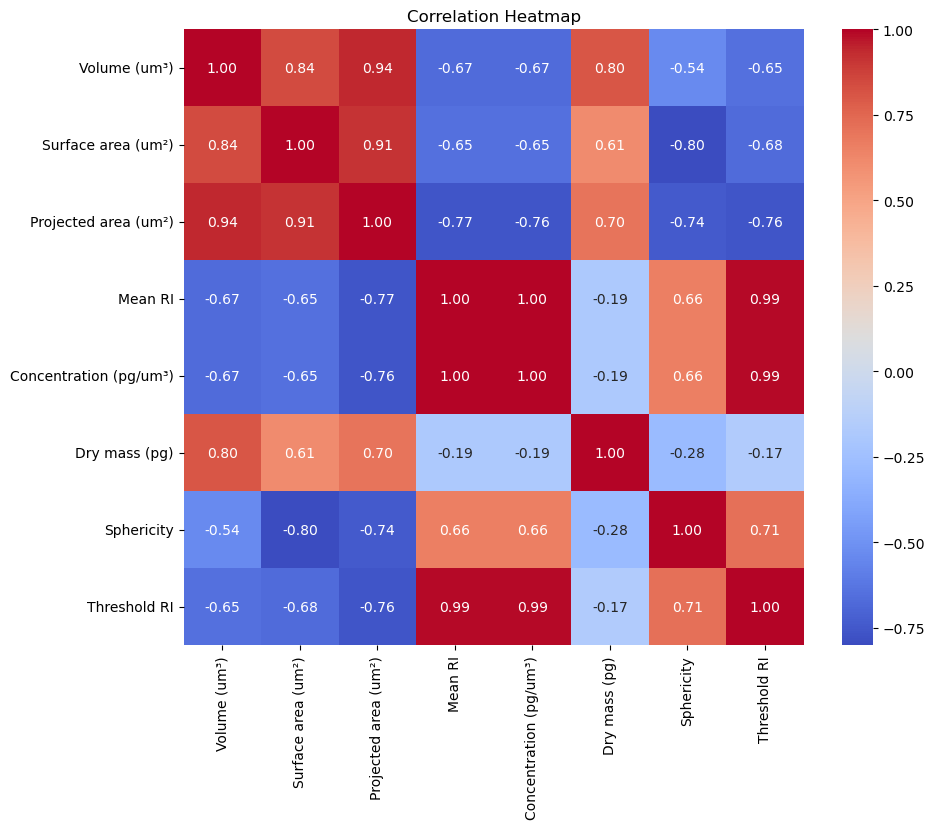

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관계수 계산
corr = df_temp.corr()

# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()